In [7]:
dataset<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

str(dataset)


'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [8]:
#install.packages("ROSE")
#Implementing oversampling
library(ROSE)
dataset1 = ovun.sample(Class~., data = dataset, method = 'over', 
                      N = 2*284315, seed = 1234)$data
head(dataset1)

Loaded ROSE 0.0-3



Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [10]:
table(dataset1$Class)
#summary(test$Class)


     0      1 
284315 284315 

In [19]:
table(dataset1$Class)


# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(dataset1), 0.8*nrow(dataset1))  # row indices for training data
trainingData <- dataset1[trainingRowIndex, ]  # model training data
testData  <- dataset1[-trainingRowIndex, ]   # test data

head(testData )


     0      1 
284315 284315 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.7914610,0.247675787,-1.5146543,...,0.24799815,0.771679402,0.90941226,-0.68928096,-0.32764183,-0.13909657,-0.05535279,-0.05975184,378.66,0
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.2376089,0.377435875,-1.3870241,...,-0.10830045,0.005273597,-0.19032052,-1.17557533,0.64737603,-0.22192884,0.06272285,0.06145763,123.50,0
10,9,-0.3382618,1.11959338,1.0443666,-0.2221873,0.49936081,-0.24676110,0.6515832,0.069538587,-0.7367273,...,-0.24691394,-0.633752642,-0.12079408,-0.38504993,-0.06973305,0.09419883,0.24621930,0.08307565,3.68,0
16,12,-0.7524170,0.34548542,2.0573229,-1.4686433,-1.15839368,-0.07784983,-0.6085814,0.003603484,-0.4361670,...,0.49962495,1.353650486,-0.25657328,-0.06508371,-0.03912435,-0.08708647,-0.18099750,0.12939406,15.99,0
17,12,1.1032154,-0.04029621,1.2673321,1.2890915,-0.73599716,0.28806916,-0.5860568,0.189379714,0.7823329,...,-0.02461201,0.196001953,0.01380165,0.10375833,0.36429754,-0.38226057,0.09280919,0.03705052,12.99,0
22,17,0.9624961,0.32846103,-0.1714791,2.1092041,1.12956557,1.69603769,0.1077116,0.521502164,-1.1913111,...,0.14399742,0.402491661,-0.04850822,-1.37186629,0.39081389,0.19996366,0.01637064,-0.01460533,34.09,0


In [11]:
##
df2 <- prcomp(dataset1, scale = TRUE)
summary(df2)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.4351 1.7251 1.45607 1.30212 1.2561 1.10106 1.08036
Proportion of Variance 0.3806 0.0960 0.06839 0.05469 0.0509 0.03911 0.03765
Cumulative Proportion  0.3806 0.4767 0.54504 0.59973 0.6506 0.68974 0.72739
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.04395 0.97295 0.91717 0.90681 0.84183 0.81845 0.74055
Proportion of Variance 0.03516 0.03054 0.02714 0.02653 0.02286 0.02161 0.01769
Cumulative Proportion  0.76255 0.79308 0.82022 0.84674 0.86960 0.89121 0.90890
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.66677 0.63519 0.62358 0.51993 0.49912 0.48078 0.40798
Proportion of Variance 0.01434 0.01301 0.01254 0.00872 0.00804 0.00746 0.00537
Cumulative Proportion  0.92324 0.93626 0.94880 0.95752 0.96556 0.97302 0.97839
                          PC22    PC23

In [12]:
##
library("factoextra")
var <- get_pca_var(df2)
var
head(var$contrib)

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,...,Dim.22,Dim.23,Dim.24,Dim.25,Dim.26,Dim.27,Dim.28,Dim.29,Dim.30,Dim.31
Time,0.6561499,1.6063427,0.10155665,1.64145245,4.7867686,1.047594e+01,7.28019696,0.7770118335,21.12707265,1.92581913,...,0.8468417,0.005208902,0.3305994,0.5563013,7.833848e-04,0.43804188,0.192279,0.64021155,1.34352673,0.00702882
V1,5.4219517,1.3935045,0.71918799,3.55097653,4.9262056,7.411805e-01,0.73176425,0.1049722693,0.40273171,0.39273433,...,1.5863125,22.851784810,5.6789495,18.1864562,5.216028e-02,1.28881170,2.021473,1.97776211,2.45508520,2.73587487
V2,5.5396090,0.5942607,4.40880853,0.07962137,5.1350801,6.330642e-01,0.23288392,0.0557740586,0.09884843,0.05688362,...,7.3365460,13.227134634,13.8763572,5.6675499,1.461693e+00,0.26279128,4.163307,0.04521776,1.12991763,10.49929439
V3,6.9364566,0.4050410,0.23401211,0.03349146,3.0952334,3.885097e-02,1.13467364,0.0992166222,0.05000577,0.22800559,...,0.5729813,0.423599975,1.1647111,1.9516738,5.497598e+00,13.10331127,10.069888,12.62142062,21.27255003,8.42321633
V4,6.2489969,0.0186936,0.04972039,3.42425889,0.2952904,1.121412e-05,0.30820248,0.7619560635,0.14972195,0.25787175,...,0.4867625,8.457748877,0.3596338,0.9185532,1.725426e-01,0.04665994,4.236311,0.38084163,0.03534253,0.74338186
V5,5.5864909,1.3844064,0.02160530,6.65313857,3.7256023,2.410482e+00,0.00858878,0.0000674117,0.19623653,0.10783076,...,0.5403123,10.405640721,1.6174157,7.8605244,1.488129e+01,7.59556980,2.342216,0.32599901,8.82468820,11.17047449


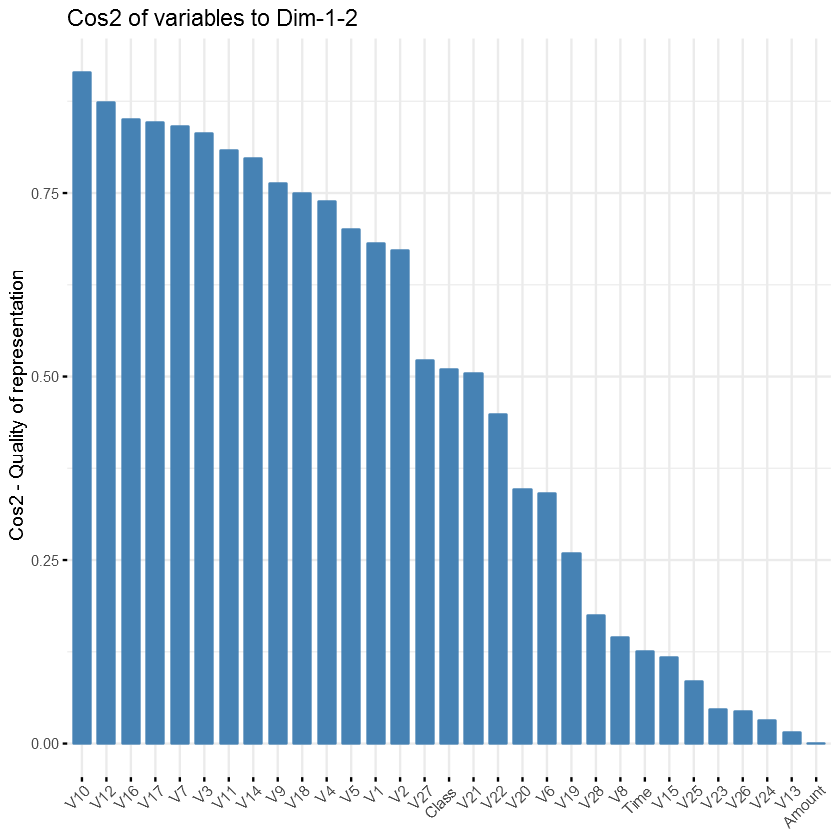

In [13]:
##
fviz_cos2(df2, choice = "var", axes = 1:2)

corrplot 0.84 loaded


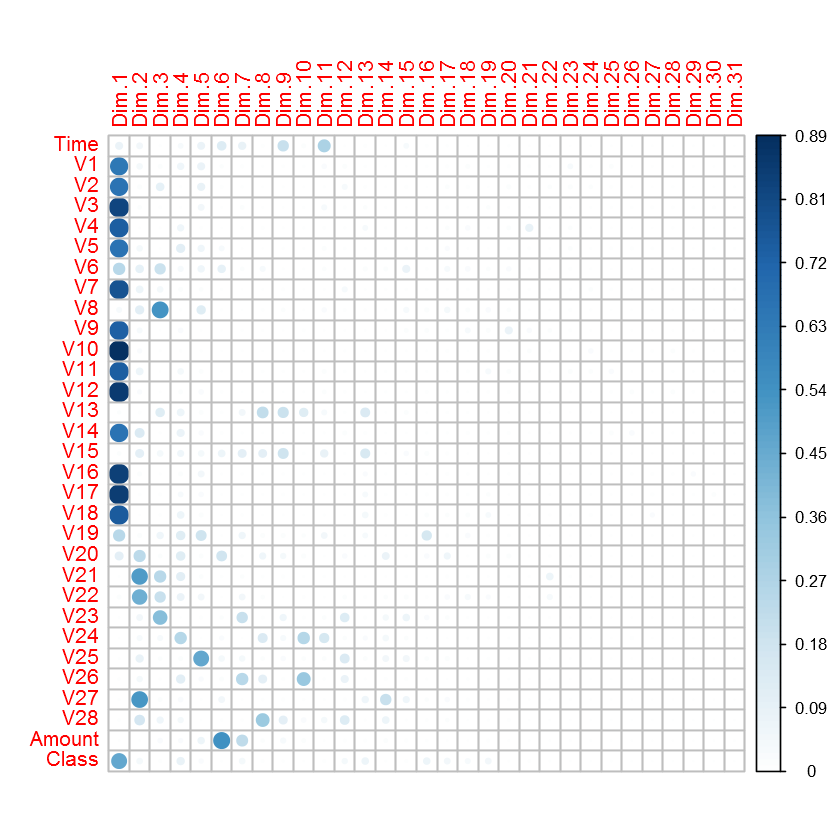

In [14]:
##
library("corrplot")
corrplot(var$cos2, is.corr=FALSE) 

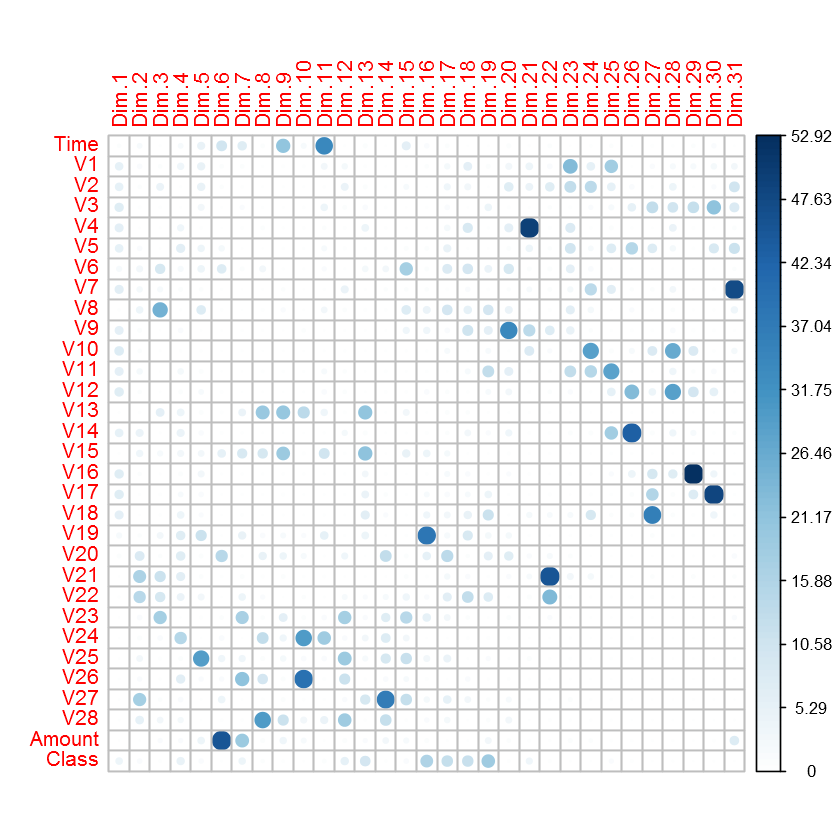

In [15]:
##
library("corrplot")
corrplot(var$contrib, is.corr=FALSE)  


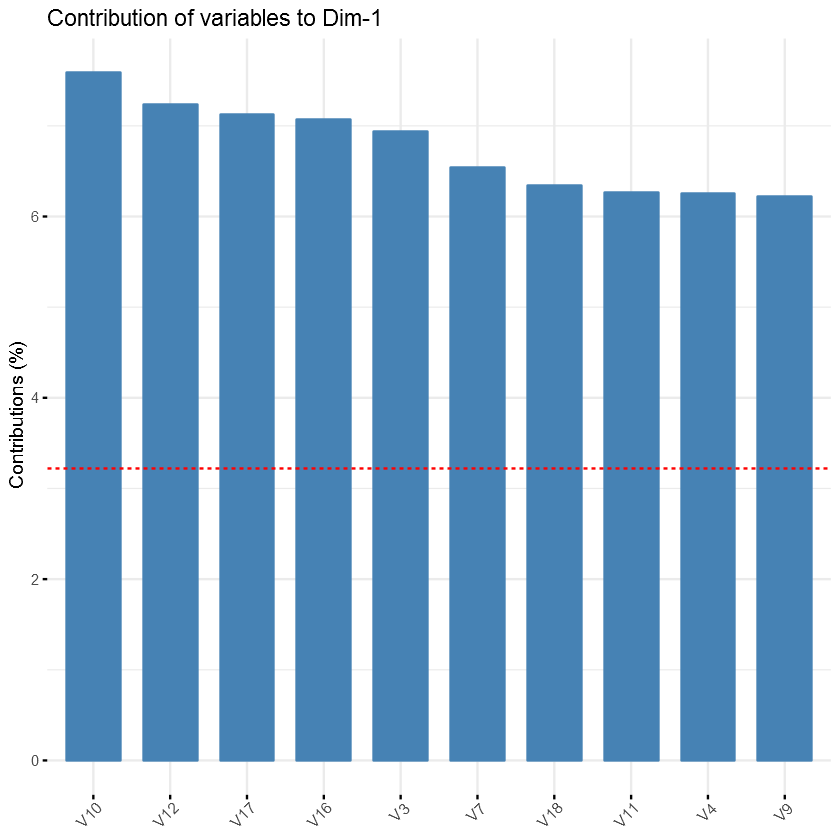

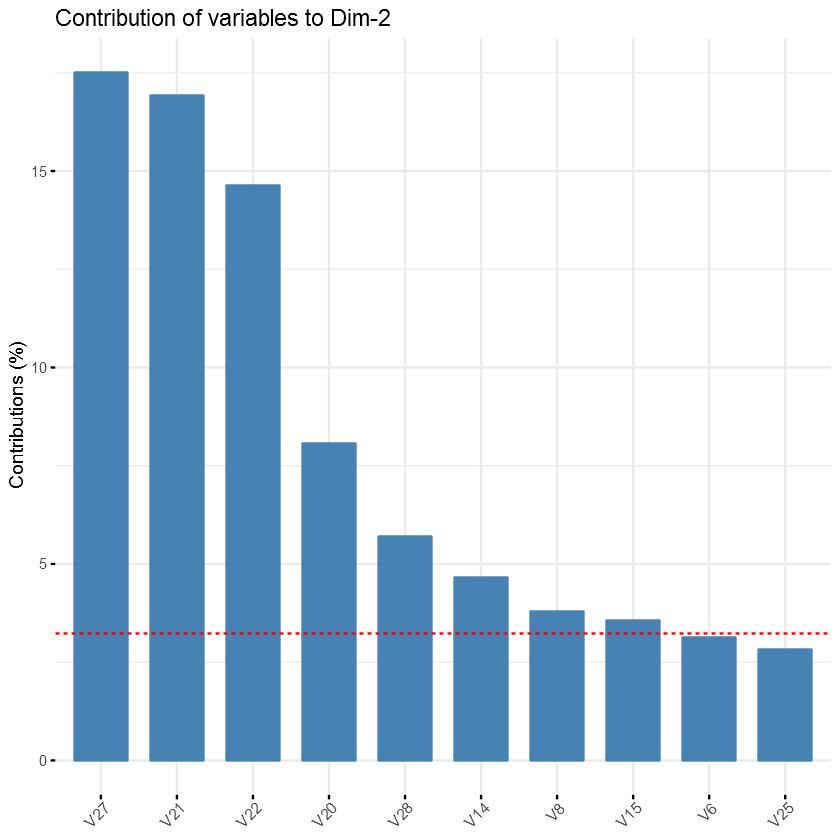

In [16]:
##
# Contributions of variables to PC1
fviz_contrib(df2, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(df2, choice = "var", axes = 2, top = 00)

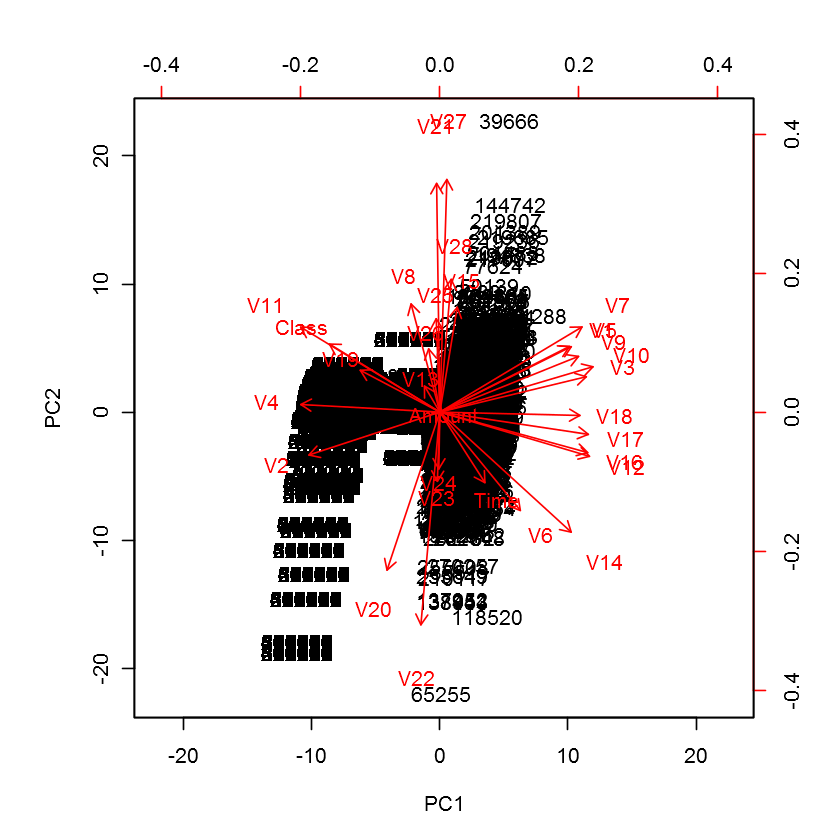

In [22]:
##
biplot(df2, scale = 0)

In [21]:
##
library("FactoMineR")
res.pca = PCA(data)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# # Description of dimension 1
res.desc$Dim.1


,correlation,p.value
V10,0.9409793,1.107122e-232
V17,0.8892323,1.508449e-168
V3,0.8807808,3.382075e-161
V16,0.8791315,7.916000e-160
V12,0.8786471,1.981098e-159
V7,0.8780281,6.361281e-159
V18,0.8728252,9.026328e-155
V9,0.8621853,8.011419e-147
V5,0.8409345,8.954278e-133
V1,0.7896305,5.205646e-106
